(28, 28)


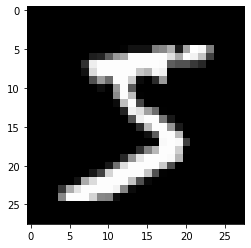

DataSet count: 70000


/Users/rogermz/miniconda3/envs/guruday/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


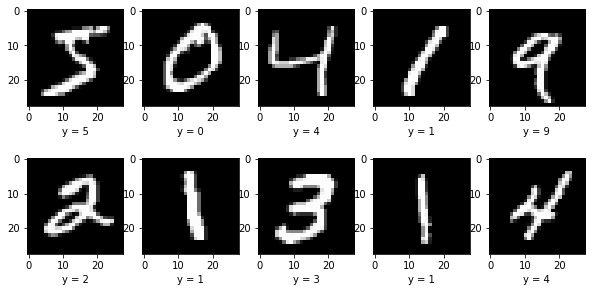

In [14]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import datetime as dt

X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.to_numpy()
y = y.to_numpy()

# show test data
muestra = True

if muestra:
    #print(len(X[0]))
    #print(X[0])
    im = X[0].reshape(28,28)
    print(im.shape)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.show()

print("DataSet count:", len(X))
nMuestras = 10
plt.figure(figsize=(nMuestras, 5))
for i in range(nMuestras):
    im = X[i].reshape(28,28)
    l1_plot = plt.subplot(nMuestras/5, 5, i + 1)
    l1_plot.imshow(im, cmap='gray', vmin=0, vmax=255)
    l1_plot.set_xlabel('y = %i' % int(y[i]))


In [9]:
print(type(X))
print('Tamaño:', len(X))

<class 'numpy.ndarray'>
Tamaño: 70000


In [13]:
#---------------- classification begins -----------------
# scale data for [0,255] -> [0,1]
# sample smaller size for testing
# full dataset classification
X_data = X/255.0
Y = y

# split data to train and test
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.2, random_state=42)


In [11]:
################ Classifier with good params ###########
# Create a classifier: a support vector classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

param_C = 5 # Regularization parameter
param_gamma = 0.05 # Kernel coefficient
classifier = svm.SVC(C=param_C,gamma=param_gamma)

# We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2021-06-30 18:09:36.047064
Stop learning 2021-06-30 18:19:21.142128
Elapsed learning 0:09:45.095064


Classification report for classifier SVC(C=5, gamma=0.05):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.99      0.98      1380
           3       0.98      0.97      0.98      1433
           4       0.98      0.98      0.98      1295
           5       0.99      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.98      0.98      1503
           8       0.97      0.98      0.98      1357
           9       0.98      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000


Confusion matrix:
[[1327    1    6    0    1    2    2    1    3    0]
 [   0 1585    5    2    1    0    0    4    2    1]
 [   0    2 1362    0    2    2    1    5    5    1]
 [  

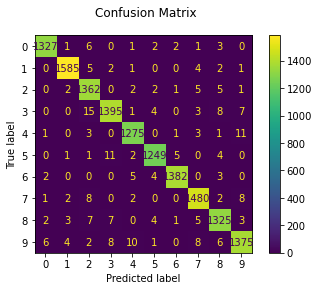

Validación: 14000 muestras
Accuracy=0.9825



In [12]:
########################################################
# Now predict the value of the test
expected = y_test
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
#plot_confusion_matrix
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

print("Validación: %d muestras"% len(y_test))
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
#print("Val_acc: %.3f"% classifier.score(X_test, y_test))
print("")

In [10]:
from joblib import dump

dump(classifier, 'modelo_mnist_svm.joblib')

['modelo_mnist_svm.joblib']

## Referencias

El presente trabajo se baso fundamental en los siguientes trabajos:

  1. GitHub: [ksopyla/svm_mnist_digit_classification](https://github.com/ksopyla/svm_mnist_digit_classification).
  2. Scikit-learn: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
  3. Scikit-learn: [MNIST classification using multinomial logistic + L1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html).